In [24]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

digits = load_digits()
X, y = digits.data, digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.975
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      1.00      0.98        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



In [34]:
def evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
    from sklearn.metrics import log_loss, balanced_accuracy_score, confusion_matrix, classification_report
    from sklearn.model_selection import learning_curve
    from sklearn.metrics import roc_curve, auc

    # Train the model
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, classifier.predict_proba(
        X_test), average='weighted', multi_class='ovr')
    average_precision = average_precision_score(
        y_test, classifier.predict_proba(X_test), average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)
    logloss = log_loss(y_test, classifier.predict_proba(X_test))
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("AUC-PR (Average Precision):", average_precision)
    print("Matthew's Correlation Coefficient (MCC):", mcc)
    print("Log Loss:", logloss)
    print("Balanced Accuracy:", balanced_acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(
        X_test), pos_label=classifier.classes_[1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-',
             color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-',
             color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()

Accuracy: 0.975
Precision: 0.975015169569027
Recall: 0.975
F1-Score: 0.9747801441618325
AUC-ROC: 0.998097065662101
AUC-PR (Average Precision): 0.9910810618926214
Matthew's Correlation Coefficient (MCC): 0.9721863874703058
Log Loss: 0.15956921160662632
Balanced Accuracy: 0.976921151439299
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 32  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  1  1  1  0  0  1 36]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5  

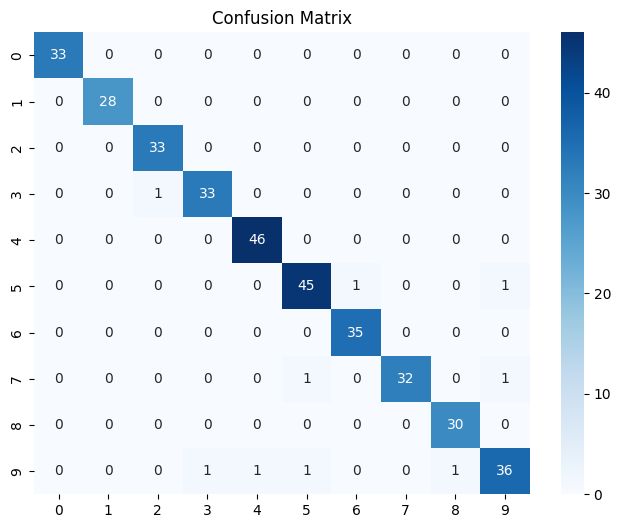

ValueError: y should be a 1d array, got an array of shape (360, 10) instead.

In [35]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

evaluate_model(knn_classifier, X_train, X_test, y_train, y_test)